In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns

In [4]:
df=pd.read_csv("/content/drive/MyDrive/QyrusAIML/Sharetest.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [5]:
len(df)

25976

In [6]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [7]:
df.shape

(25976, 25)

In [8]:
print(list(df.columns))

['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


***In the dataset first two columns do not affect the classificaton so its better to drop them***

In [9]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

In [10]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


# ***Distribution*** ***of*** ***Satisfaction*** ***review***

---



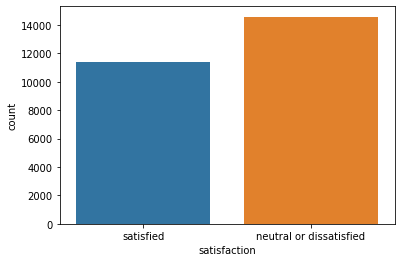

In [11]:
sns.countplot(x='satisfaction',data=df)

 ***Let's look at the ratio of the values of the target variable:***

---



([<matplotlib.patches.Wedge at 0x7f0a0aaa9910>,
 [Text(-0.20957359088360364, 1.0798513369923437, 'Neutral or dissatisfied'),
  Text(0.20957359088360372, -1.0798513369923437, 'Satisfied')],
 [Text(-0.11431286775469288, 0.5890098201776419, '56.1%'),
  Text(0.11431286775469293, -0.5890098201776419, '43.9%')])

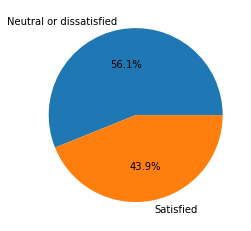

In [12]:
plt.pie(df.satisfaction.value_counts(), labels=["Neutral or dissatisfied", "Satisfied"], autopct = '%1.1f%%')

# ***Distribution*** ***on*** ***Predicted*** ***Variables***

---



***1.Distribution on Age***

In [13]:
df['Age'].describe()

count    25976.000000
mean        39.620958
std         15.135685
min          7.000000
25%         27.000000
50%         40.000000
75%         51.000000
max         85.000000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


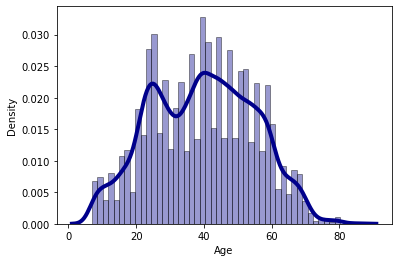

In [14]:
sns.distplot(df['Age'], hist=True, kde=True,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

***3.Distribution on Customer Type***

In [15]:
df['Customer Type'].value_counts()

Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64

Text(0.5, 1.0, 'Value count of Customer Type feature')

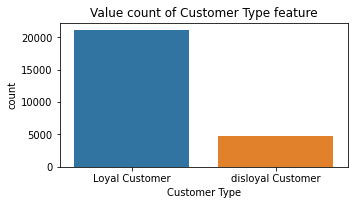

In [16]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Customer Type')
plt.title('Value count of Customer Type feature')

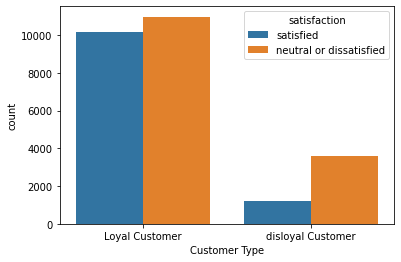

In [17]:
sns.countplot(x = 'Customer Type', hue = 'satisfaction', data = df)
plt.show()

***4.Type of Travel***

In [18]:
df['Type of Travel'].value_counts()

Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64

Text(0.5, 1.0, 'Value count of Type of travel feature')

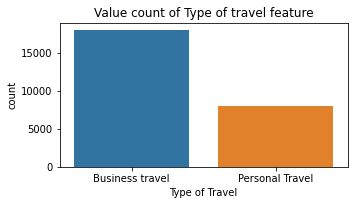

In [19]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Type of Travel')
plt.title('Value count of Type of travel feature')

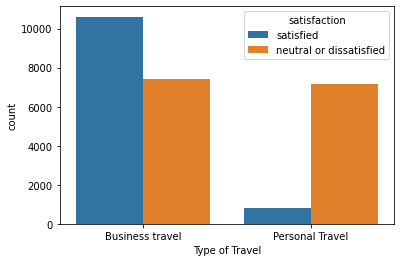

In [20]:
sns.countplot(x = 'Type of Travel', hue = 'satisfaction', data = df)
plt.show()

***5.Distribution on Class***

In [21]:
df['Class'].value_counts()

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64

Text(0.5, 1.0, 'Value count of Class feature')

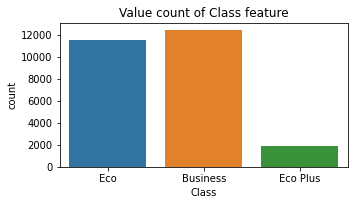

In [22]:
fig = plt.figure(figsize=(4,2))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Class')
plt.title('Value count of Class feature')

***6.Flight Distance***

In [23]:
df['Flight Distance'].describe()

count    25976.000000
mean      1193.788459
std        998.683999
min         31.000000
25%        414.000000
50%        849.000000
75%       1744.000000
max       4983.000000
Name: Flight Distance, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


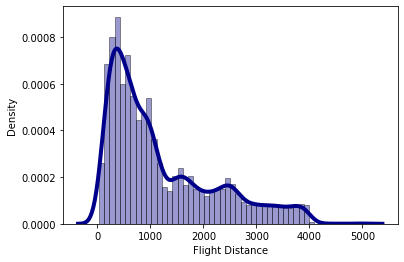

In [24]:
sns.distplot(df['Flight Distance'], hist=True, kde=True,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

 ***7.Distribution on Seat Comfort***




Text(0.5, 1.0, 'Histogram of Seat Comfort')

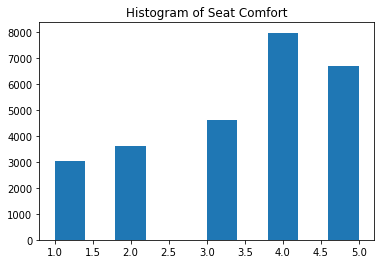

In [25]:
plt.figure
plt.hist(df['Seat comfort'])
plt.title('Histogram of Seat Comfort')

In [26]:
def sub_bar_plots(cols, cat):
    fig, axis = plt.subplots(9, 2, figsize=(20, 40))
    fig.tight_layout(pad=3.0)
    for features, ax in zip(cols, axis.ravel()):
        ax = sns.barplot(data = df, x = 'satisfaction', y = features, hue = cat, ax=ax)

In [27]:
cols = df.select_dtypes([np.number]).columns[1:]
cols

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

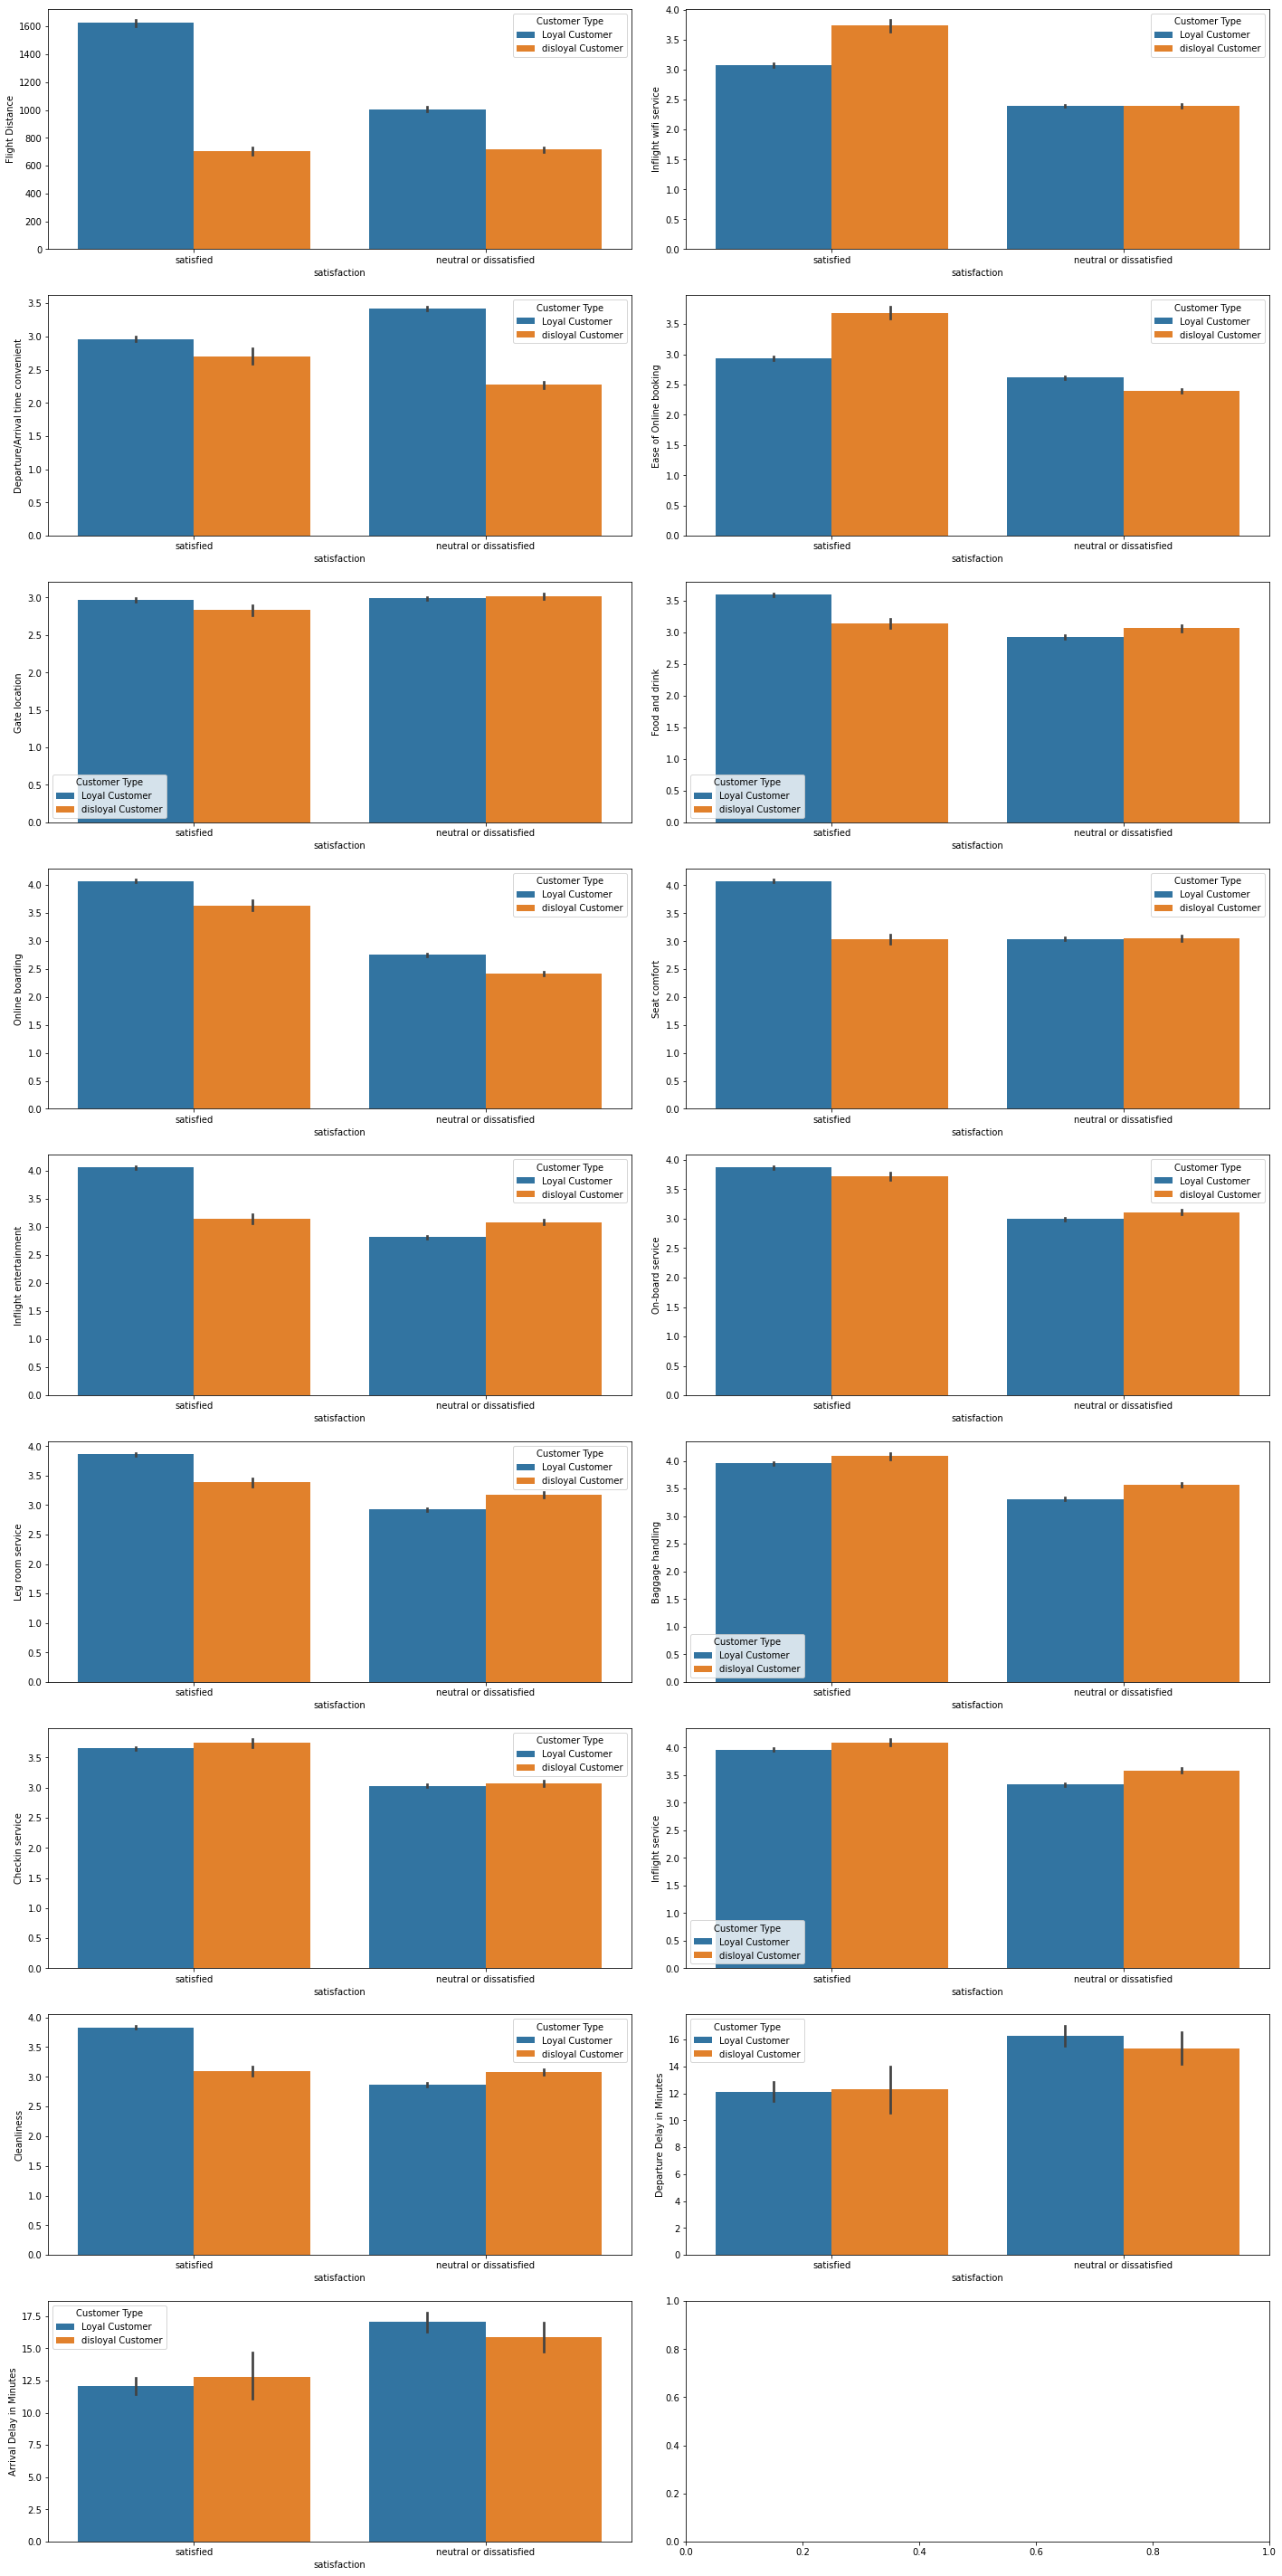

In [28]:
sub_bar_plots(cols, 'Customer Type')

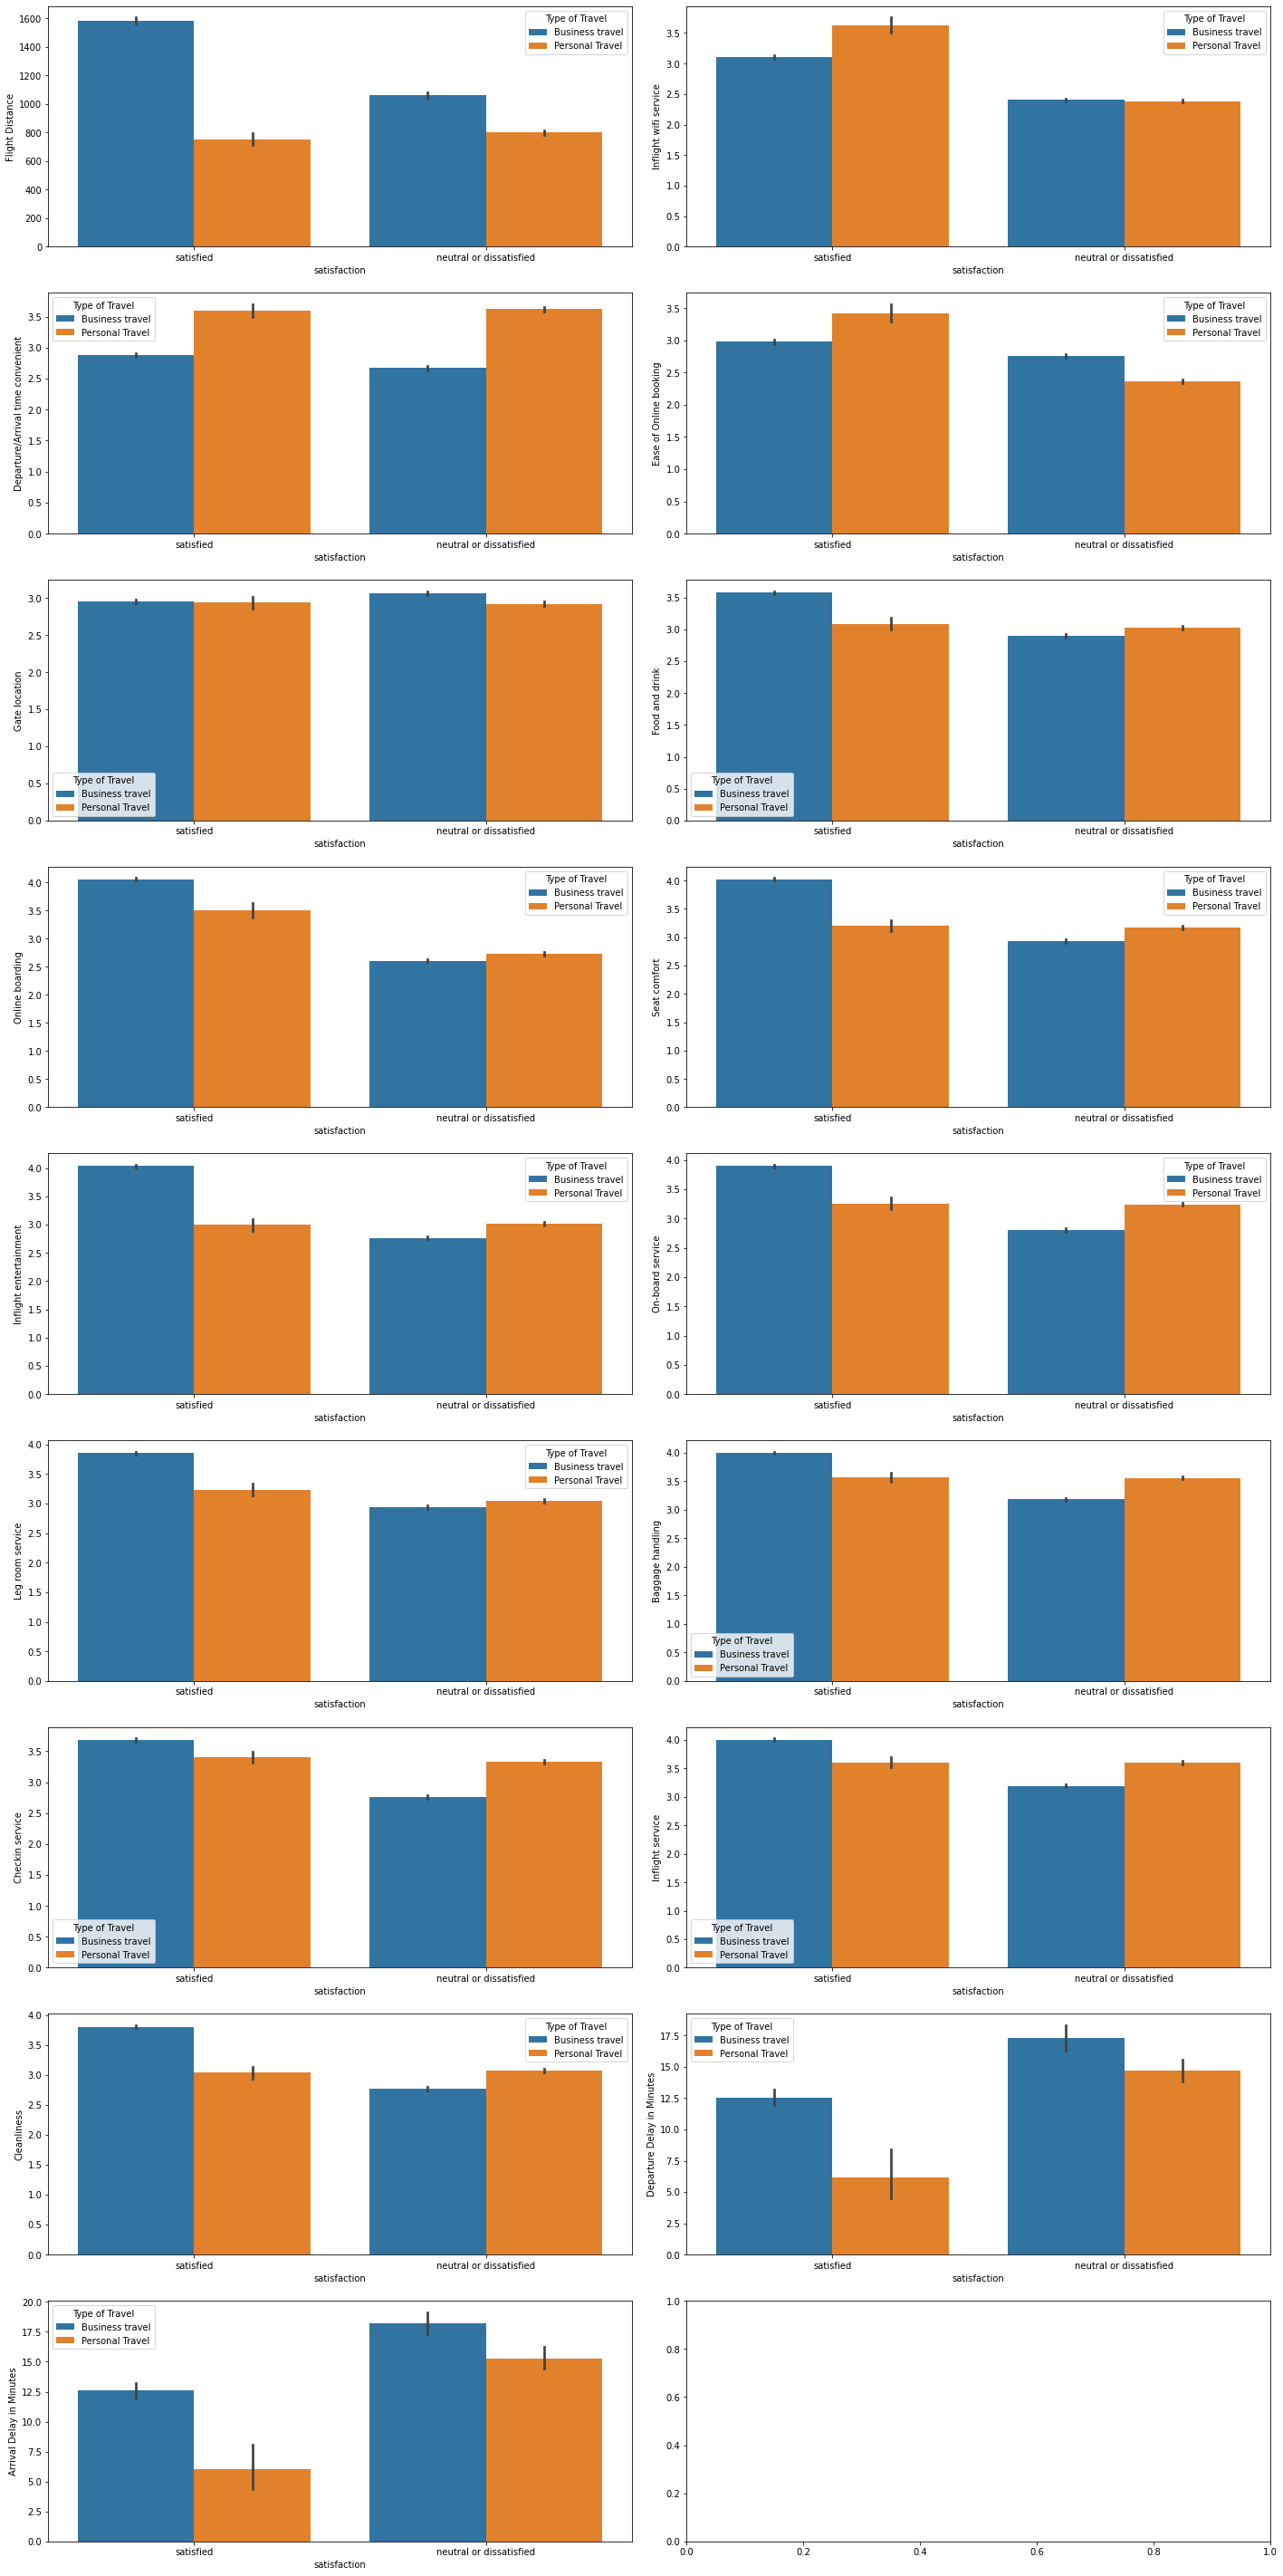

In [29]:
sub_bar_plots(cols, 'Type of Travel')

# ***Plotting relationship***

In [144]:
df.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Type of Travel,Customer Type,Class,Gender
Age,1.000000,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,...,-0.049863,0.025388,-0.059083,0.048418,-0.007359,0.121697,-0.029773,-0.294210,-0.115125,0.009261
Flight Distance,0.099409,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,...,0.071549,0.075720,0.066355,0.105578,0.000117,0.295292,-0.264559,-0.229306,-0.425756,-0.005222
Inflight wifi service,0.009242,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,...,0.118199,0.046046,0.108419,0.125768,-0.012553,0.280395,-0.109021,0.001333,-0.032293,-0.006323
Departure/Arrival time convenient,0.032449,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,...,0.065684,0.082461,0.067804,-0.007670,-0.001442,-0.064798,0.246425,-0.206864,0.076170,0.008417
Ease of Online booking,0.013565,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,...,0.040685,-0.000108,0.035769,0.010974,-0.003371,0.157709,-0.136350,-0.012340,-0.098329,0.001703
Gate location,0.003308,0.008410,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,...,-0.004395,-0.054954,-0.005129,-0.014195,0.007559,-0.016627,-0.026540,-0.001940,-0.010509,-0.005628
Food and drink,0.023841,0.057322,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,...,0.037617,0.076775,0.039992,0.659253,-0.028392,0.216868,-0.091164,-0.047269,-0.095590,-0.014422
Online boarding,0.202058,0.214629,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,...,0.084583,0.203309,0.071972,0.320912,-0.025841,0.494526,-0.220843,-0.188418,-0.299951,-0.056031
Seat comfort,0.154507,0.158957,0.116991,-0.001926,0.022811,-0.000721,0.580970,0.415414,1.000000,0.616817,...,0.074927,0.182469,0.067306,0.683924,-0.033073,0.346275,-0.140981,-0.143362,-0.220988,-0.047765
Inflight entertainment,0.068998,0.137538,0.201782,-0.022326,0.044715,-0.000340,0.627265,0.279391,0.616817,1.000000,...,0.382782,0.114343,0.411018,0.695269,-0.028499,0.398951,-0.171904,-0.090418,-0.199558,-0.005217


In [30]:
del df['Departure Delay in Minutes']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

# ***Data Pre-processing***

***Replacing the null values by something constant values***

In [31]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [32]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [33]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

***We have all numeric values but 3-4 columns are an text values so its good to convert everything to numeric values.***

In [34]:
print(list(df.columns))

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes', 'satisfaction']


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Type of Travel'])
label

array([0, 0, 0, ..., 1, 0, 1])

In [36]:
df.drop("Type of Travel", axis=1, inplace=True)
df["Type of Travel"] = label

In [37]:
df

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Type of Travel
0,Female,Loyal Customer,52,Eco,160,5,4,3,4,3,...,5,5,5,5,2,5,5,44.0,satisfied,0
1,Female,Loyal Customer,36,Business,2863,1,1,3,1,5,...,4,4,4,4,3,4,5,0.0,satisfied,0
2,Male,disloyal Customer,20,Eco,192,2,0,2,4,2,...,2,4,1,3,2,2,2,0.0,neutral or dissatisfied,0
3,Male,Loyal Customer,44,Business,3377,0,0,0,2,3,...,1,1,1,1,3,1,4,6.0,satisfied,0
4,Female,Loyal Customer,49,Eco,1182,2,3,4,3,4,...,2,2,2,2,4,2,4,20.0,satisfied,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business,526,3,3,3,1,4,...,4,3,2,4,4,5,4,0.0,neutral or dissatisfied,0
25972,Male,Loyal Customer,23,Business,646,4,4,4,4,4,...,4,4,5,5,5,5,4,0.0,satisfied,0
25973,Female,Loyal Customer,17,Eco,828,2,5,1,5,2,...,2,4,3,4,5,4,2,0.0,neutral or dissatisfied,1
25974,Male,Loyal Customer,14,Business,1127,3,3,3,3,4,...,4,3,2,5,4,5,4,0.0,satisfied,0


In [38]:
label1 = le.fit_transform(df['Customer Type'])
label1

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
df.drop("Customer Type", axis=1, inplace=True)
df["Customer Type"] = label1
df

,Gender,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Type of Travel,Customer Type
0,Female,52,Eco,160,5,4,3,4,3,4,...,5,5,5,2,5,5,44.0,satisfied,0,0
1,Female,36,Business,2863,1,1,3,1,5,4,...,4,4,4,3,4,5,0.0,satisfied,0,0
2,Male,20,Eco,192,2,0,2,4,2,2,...,4,1,3,2,2,2,0.0,neutral or dissatisfied,0,1
3,Male,44,Business,3377,0,0,0,2,3,4,...,1,1,1,3,1,4,6.0,satisfied,0,0
4,Female,49,Eco,1182,2,3,4,3,4,1,...,2,2,2,4,2,4,20.0,satisfied,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,34,Business,526,3,3,3,1,4,3,...,3,2,4,4,5,4,0.0,neutral or dissatisfied,0,1
25972,Male,23,Business,646,4,4,4,4,4,4,...,4,5,5,5,5,4,0.0,satisfied,0,0
25973,Female,17,Eco,828,2,5,1,5,2,1,...,4,3,4,5,4,2,0.0,neutral or dissatisfied,1,0
25974,Male,14,Business,1127,3,3,3,3,4,4,...,3,2,5,4,5,4,0.0,satisfied,0,0


In [40]:
label3 = le.fit_transform(df['Class'])
label3

array([1, 0, 1, ..., 1, 0, 1])

In [41]:
df.drop("Class", axis=1, inplace=True)
df["Class"] = label3
df

,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Type of Travel,Customer Type,Class
0,Female,52,160,5,4,3,4,3,4,3,...,5,5,2,5,5,44.0,satisfied,0,0,1
1,Female,36,2863,1,1,3,1,5,4,5,...,4,4,3,4,5,0.0,satisfied,0,0,0
2,Male,20,192,2,0,2,4,2,2,2,...,1,3,2,2,2,0.0,neutral or dissatisfied,0,1,1
3,Male,44,3377,0,0,0,2,3,4,4,...,1,1,3,1,4,6.0,satisfied,0,0,0
4,Female,49,1182,2,3,4,3,4,1,2,...,2,2,4,2,4,20.0,satisfied,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,34,526,3,3,3,1,4,3,4,...,2,4,4,5,4,0.0,neutral or dissatisfied,0,1,0
25972,Male,23,646,4,4,4,4,4,4,4,...,5,5,5,5,4,0.0,satisfied,0,0,0
25973,Female,17,828,2,5,1,5,2,1,2,...,3,4,5,4,2,0.0,neutral or dissatisfied,1,0,1
25974,Male,14,1127,3,3,3,3,4,4,4,...,2,5,4,5,4,0.0,satisfied,0,0,0


In [42]:
label4 = le.fit_transform(df['Gender'])
label4

array([0, 0, 1, ..., 0, 1, 0])

In [43]:
df.drop("Gender", axis=1, inplace=True)
df["Gender"] = label4
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Type of Travel,Customer Type,Class,Gender
0,52,160,5,4,3,4,3,4,3,5,...,5,2,5,5,44.0,satisfied,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,4,3,4,5,0.0,satisfied,0,0,0,0
2,20,192,2,0,2,4,2,2,2,2,...,3,2,2,2,0.0,neutral or dissatisfied,0,1,1,1
3,44,3377,0,0,0,2,3,4,4,1,...,1,3,1,4,6.0,satisfied,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,2,4,20.0,satisfied,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,4,4,5,4,0.0,neutral or dissatisfied,0,1,0,1
25972,23,646,4,4,4,4,4,4,4,4,...,5,5,5,4,0.0,satisfied,0,0,0,1
25973,17,828,2,5,1,5,2,1,2,2,...,4,5,4,2,0.0,neutral or dissatisfied,1,0,1,0
25974,14,1127,3,3,3,3,4,4,4,4,...,5,4,5,4,0.0,satisfied,0,0,0,1


# ***Now everything have being converted to numerical values***

In [44]:
df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [45]:
sol= {'satisfied' : 1, 'neutral or dissatisfied': 0}
df['satisfaction'] = df['satisfaction'].map(sol)
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Type of Travel,Customer Type,Class,Gender
0,52,160,5,4,3,4,3,4,3,5,...,5,2,5,5,44.0,1,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,4,3,4,5,0.0,1,0,0,0,0
2,20,192,2,0,2,4,2,2,2,2,...,3,2,2,2,0.0,0,0,1,1,1
3,44,3377,0,0,0,2,3,4,4,1,...,1,3,1,4,6.0,1,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,2,4,20.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,4,4,5,4,0.0,0,0,1,0,1
25972,23,646,4,4,4,4,4,4,4,4,...,5,5,5,4,0.0,1,0,0,0,1
25973,17,828,2,5,1,5,2,1,2,2,...,4,5,4,2,0.0,0,1,0,1,0
25974,14,1127,3,3,3,3,4,4,4,4,...,5,4,5,4,0.0,1,0,0,0,1


In [46]:
X = df.drop('satisfaction', axis = 1).iloc[:,1:]
y = df['satisfaction']
X

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,Type of Travel,Customer Type,Class,Gender
0,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,44.0,0,0,1,0
1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0.0,0,0,0,0
2,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0.0,0,1,1,1
3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,6.0,0,0,0,1
4,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,20.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0.0,0,1,0,1
25972,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0.0,0,0,0,1
25973,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0.0,1,0,1,0
25974,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0.0,0,0,0,1


In [47]:
y

0        1
1        1
2        0
3        1
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 25976, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18183, 20)
(7793, 20)
(18183,)
(7793,)


In [49]:
X_train

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,Type of Travel,Customer Type,Class,Gender
25666,458,4,2,4,2,1,4,1,1,1,1,2,2,2,1,18.0,0,1,1,1
920,2611,3,3,2,3,4,4,4,4,5,3,4,3,4,4,0.0,0,0,0,1
8073,304,1,4,1,4,4,4,3,3,3,1,3,2,3,4,0.0,1,0,0,0
2214,927,3,3,3,1,5,3,5,5,4,3,1,2,4,5,0.0,1,0,1,0
16129,404,2,0,1,4,3,1,3,3,2,1,1,3,3,3,0.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,109,2,4,2,4,4,3,3,2,2,2,2,2,2,4,0.0,1,0,1,0
19648,281,3,4,3,3,4,4,4,3,3,3,3,5,3,5,80.0,1,0,0,0
9845,453,1,4,1,4,4,1,4,4,4,2,4,4,3,4,0.0,1,0,0,0
10799,283,4,4,4,4,2,3,3,4,4,4,4,4,4,3,29.0,0,0,1,0


***MODEL 1: SUPPORT VECTOR MACHINE***

In [50]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [51]:
svc_pred = svc_model.predict(X_test)

***Use of Confusion Matrix : It gives a better idea of model's performance than accuracy***

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, svc_pred))

[[3668  685]
 [1960 1480]]


In [53]:
from sklearn import metrics
print("Accuracy Score=", format(metrics.accuracy_score(y_test,svc_pred)))

Accuracy Score= 0.660592839727961


# ***Support Vector Machine accuracy is 66%***

***MODEL 2:DECISION TREE***

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train) 

DecisionTreeClassifier()

In [55]:
prediction=dtree.predict(X_test)

In [56]:
print(confusion_matrix(y_test, prediction))

[[4089  264]
 [ 257 3183]]


In [57]:
print('Accuracy Score=', format(metrics.accuracy_score(y_test,prediction)))

Accuracy Score= 0.9331451302450917


# ***Decision Tree accuracy score is 93%***

***MODEL 3:RANDOM FOREST***

In [58]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
pred=model.predict(X_test)


In [60]:
print(confusion_matrix(y_test, pred))

[[4201  152]
 [ 227 3213]]


In [61]:
print('Accuracy Score=', format(metrics.accuracy_score(y_test,pred)))


Accuracy Score= 0.9513666110612088


# ***Random Forest accuracy is 95%***

# ***Predicting Manually***

In [62]:
input_data1 =(160,5,4,3,4,3,4,3,5,5,5,2,5,5,44.0,1,0,0,1,0)
input_data_array1 = np.asarray(input_data1)
input_data_reshaped1 = input_data_array1.reshape(1,-1)
prediction1 = model.predict(input_data_reshaped1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [63]:
print(prediction1)

[1]


In [64]:
input_data1 =(192,2,0,2,4,2,2,2,2,4,1,3,2,2,0.0,0,0,1,1,1)
input_data_array1 = np.asarray(input_data1)
input_data_reshaped1 = input_data_array1.reshape(1,-1)
prediction2 = model.predict(input_data_reshaped1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [65]:
print(prediction2)

[0]


In [66]:
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction,Type of Travel,Customer Type,Class,Gender
0,52,160,5,4,3,4,3,4,3,5,...,5,2,5,5,44.0,1,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,4,3,4,5,0.0,1,0,0,0,0
2,20,192,2,0,2,4,2,2,2,2,...,3,2,2,2,0.0,0,0,1,1,1
3,44,3377,0,0,0,2,3,4,4,1,...,1,3,1,4,6.0,1,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,2,4,20.0,1,0,0,1,0


# ***Most important features affecting Customer/Passenger satisfaction***

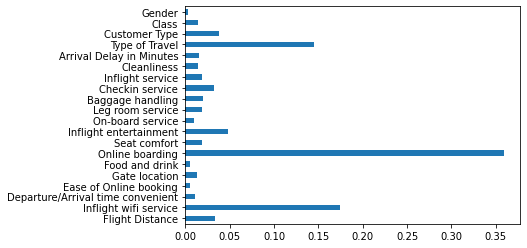

In [67]:
(pd.Series(dtree.feature_importances_, index=X.columns).plot(kind='barh'))

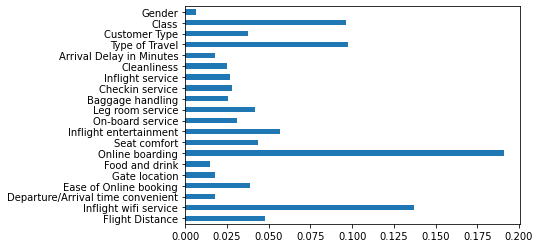

In [68]:
(pd.Series(model.feature_importances_, index=X.columns).plot(kind='barh'))

In [91]:
from joblib import dump
dump(model,"model.joblib")


['model.joblib']

In [92]:
dump(dtree,"dtree.joblib")

['dtree.joblib']

In [93]:
model

RandomForestClassifier()

In [94]:
dtree

DecisionTreeClassifier()

In [ ]:
df.info()

In [95]:
!pip install fastapi nest-asyncio pyngrok uvicorn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [140]:
from typing import Any
from joblib import load
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel

app = FastAPI()

model=load("model.joblib")

app.add_middleware(
    CORSMiddleware,
    allow_origins=['*'],
    allow_credentials=True,
    allow_methods=['*'],
    allow_headers=['*'],
)

class PostRepData(BaseModel):
  X : Any
  
  
@app.post("/pre")
def api_pred(payload:PostRepData):
  print(payload)
  inp=payload.X
  prediction=model.predict([inp])
  print(prediction)
  return int(prediction[0])
  #return {"ok": True, "preds": prediction}

@app.post("/api/rep_data")
def api_rep_data(payload: PostRepData):
  print("PAYLOAD: ", payload)
  return payload

@app.get('/')
async def root():
    return {'hello': 'world'}
  

In [ ]:
class Air(BaseModel):
  Age: int
  Flight Distance   : int
  Inflight wifi service: int
  Departure/Arrival time convenient: int
  Ease of Online booking: int
  Gate location: int
  Food and drink: int
  Online boarding:int
  Seat comfort:int
  Inflight entertainment:int
  On-board service:int
  Leg room service:int
  Baggage handling:int
  Checkin service:int
  Inflight service:int
  Cleanliness : int
  Arrival Delay in Minutes : float
  satisfaction: int
  Type of Travel:int
  Customer Type : int
  Class :int
  Gender:int

In [141]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
print(f"""
RUN THE FOLLOWING COMMAND TO MAKE A GET REQUEST
curl -XGET {ngrok_tunnel.public_url} 
or
curl -XGET {ngrok_tunnel.public_url}/api/get_data 
""")
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: http://4a1f-34-125-79-215.ngrok.io

RUN THE FOLLOWING COMMAND TO MAKE A GET REQUEST
curl -XGET http://4a1f-34-125-79-215.ngrok.io 
or
curl -XGET http://4a1f-34-125-79-215.ngrok.io/api/get_data 



INFO:     Started server process [58]
INFO:uvicorn.error:Started server process [58]
INFO:     Waiting for application startup.
INFO:uvicorn.error:Waiting for application startup.
INFO:     Application startup complete.
INFO:uvicorn.error:Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:uvicorn.error:Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


X=[160, 5, 4, 3, 4, 3, 4, 3, 5, 5, 5, 2, 5, 5, 44.0, 1, 0, 0, 1, 0]
[1]
INFO:     34.125.39.127:0 - "POST /pre HTTP/1.1" 200 OK


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


INFO:     34.125.39.127:0 - "POST //api/rep_data HTTP/1.1" 404 Not Found
PAYLOAD:  X=[160, 5, 4, 3, 4, 3, 4, 3, 5, 5, 5, 2, 5, 5, 44.0, 1, 0, 0, 1, 0]
INFO:     34.125.39.127:0 - "POST /api/rep_data HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:uvicorn.error:Shutting down
INFO:     Waiting for application shutdown.
INFO:uvicorn.error:Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:uvicorn.error:Application shutdown complete.
INFO:     Finished server process [58]
INFO:uvicorn.error:Finished server process [58]
